# Data Cleaning and Preparation

In [24]:
# importing necessary libraries
import pandas as pd
import numpy as np
from IPython.display import display

In [25]:
# Data Cleaning and Preparation
# Load the dataset
df = pd.read_csv('../data/raw/electric_vehicle_sales_by_state.csv')

# Show distinct states with a limit of 10
print("\n" + 20*'=')
print("Top 10 Distinct states:")
print(20*'=')
unique_states = df['state'].unique()[:10]
print('\n'.join([f"- {state}" for state in sorted(df['state'].unique())]))

# Show total states without limit
print("\n" + 20*'=')
print("Total distinct states:")
print(20*'=')
print(len(df['state'].unique()))

# Optional: Show sample data for these states
print("\n" + 20*'=')
print("Sample data for these states:")
print(20*'=')
display(df[df['state'].isin(unique_states)].head(10))

# Data Shape
print("\n" + 20*'=')
print("Data shape:")
print(20*'=')
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Top 10 Distinct states:
- Andaman & Nicobar
- Andaman & Nicobar Island
- Andhra Pradesh
- Arunachal Pradesh
- Assam
- Bihar
- Chandigarh
- Chhattisgarh
- DNH and DD
- Delhi
- Goa
- Gujarat
- Haryana
- Himachal Pradesh
- Jammu and Kashmir
- Jharkhand
- Karnataka
- Kerala
- Ladakh
- Madhya Pradesh
- Maharashtra
- Manipur
- Meghalaya
- Mizoram
- Nagaland
- Odisha
- Puducherry
- Punjab
- Rajasthan
- Sikkim
- Tamil Nadu
- Tripura
- Uttar Pradesh
- Uttarakhand
- West Bengal

Total distinct states:
35

Sample data for these states:


,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229
5,01-Jun-21,Sikkim,4-Wheelers,0,244
6,01-Jul-21,Sikkim,2-Wheelers,0,458
7,01-Jul-21,Sikkim,4-Wheelers,0,452
8,01-Aug-21,Sikkim,2-Wheelers,0,489
9,01-Aug-21,Sikkim,4-Wheelers,0,408



Data shape:
Rows: 2445, Columns: 5


## Data Overview: Understanding the Electric Vehicle Dataset

The dataset provides information about electric vehicle sales across different states in India. Looking at the first row of data:

>On April 1, 2021, in the state of Sikkim, no electric two-wheelers (0 units) were sold, while the total two-wheeler vehicles sold was 398 units. This indicates that the electric vehicle adoption for two-wheelers in Sikkim was non-existent at the beginning of our data collection period.

The dataset tracks both two-wheeler and four-wheeler categories across multiple states, allowing us to analyze the penetration of electric vehicles in different vehicle segments and geographical regions over time.

## Conceptualize the Data: Electric Vehicle Sales Analysis

### Dataset Overview
This dataset tracks electric vehicle sales across various Indian states over time, containing 2,445 records with the following key fields:
- `date`: Time period of the sales data (monthly from April 2021 to March 2024)
- `state`: Indian state/territory where sales were recorded
- `vehicle_category`: Type of vehicle (2-Wheelers or 4-Wheelers)
- `electric_vehicles_sold`: Number of electric vehicles sold
- `total_vehicles_sold`: Total vehicles sold (both electric and conventional)

### Key Concepts
1. **Market Penetration**: The dataset allows analysis of EV adoption rates across different states
2. **Temporal Trends**: With data spanning 3 years, we can track growth patterns in EV sales
3. **Regional Disparities**: Initial observations show varying levels of EV adoption across states
4. **Vehicle Category Comparison**: Separate tracking of 2-wheeler vs 4-wheeler segments provides insights into different market dynamics

### Initial Observations
- Several smaller states/territories (like Sikkim) show minimal EV adoption at the beginning of the period
- The dataset covers diverse regions, from northeastern states to islands and union territories
- Complete data availability across all columns suggests a well-maintained dataset suitable for comprehensive analysis
- The dataset does not explicitly provide the number of conventional vehicles sold, but this can be derived by subtracting `electric_vehicles_sold` from `total_vehicles_sold`

## Understanding the 'L' in CLEAN Framework: Learning from the Data

### Initial Data Exploration

From the electric vehicle sales dataset, we can learn several key insights about the EV market in India:

1. **Geographical Distribution**: The data spans across diverse regions including small states like Sikkim, northeastern states like Manipur and Meghalaya, and union territories like DNH and DD.

2. **Vehicle Segmentation**: The market is clearly segmented between 2-wheeler and 4-wheeler electric vehicles, allowing for comparison of adoption rates in these distinct segments.

3. **Adoption Patterns**: Initial data points from April 2021 show minimal or zero adoption in some states (like Sikkim), suggesting EV penetration was in early stages at the beginning of our data period.

4. **Market Size Variations**: The total vehicle sales vary significantly between states, indicating different market sizes that need to be considered when evaluating EV adoption rates.

### Key Questions Emerging from the Data

- What is the overall trend in EV adoption across India over the 3-year period?
- Which states show the highest growth rate in electric vehicle adoption?
- Is there a difference in adoption patterns between 2-wheeler and 4-wheeler segments?
- Do seasonal patterns exist in EV sales across different regions?
- What is the correlation between total vehicle market size and EV penetration?

These learnings provide the foundation for our subsequent analyses, helping us focus on the most meaningful trends and patterns in India's evolving electric vehicle market.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


In [27]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Check the DataFrame with converted dates
print("\nFirst few rows after date conversion:")
display(df.head())

# Check data types after conversion
print("\nData types after conversion:")
display(df.dtypes)

# Basic time-based information
print(f"\nTime span: {df['date'].min().strftime('%B %Y')} to {df['date'].max().strftime('%B %Y')}")
print(f"Number of months: {(df['date'].max().year - df['date'].min().year) * 12 + df['date'].max().month - df['date'].min().month + 1}")

# Check for any missing values
print(f"\nMissing values in the dataset:")
display(df.isna().sum())

# Check unique values in categorical columns
print(f"\nNumber of unique states: {df['state'].nunique()}")
print(f"Vehicle categories: {', '.join(df['vehicle_category'].unique())}")


First few rows after date conversion:


,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,Sikkim,2-Wheelers,0,398
1,2021-04-01,Sikkim,4-Wheelers,0,361
2,2021-05-01,Sikkim,2-Wheelers,0,113
3,2021-05-01,Sikkim,4-Wheelers,0,98
4,2021-06-01,Sikkim,2-Wheelers,0,229



Data types after conversion:


date                      datetime64[ns]
state                             object
vehicle_category                  object
electric_vehicles_sold             int64
total_vehicles_sold                int64
dtype: object


Time span: April 2021 to March 2024
Number of months: 36

Missing values in the dataset:


date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64


Number of unique states: 35
Vehicle categories: 2-Wheelers, 4-Wheelers


In [28]:
df.describe()

,date,electric_vehicles_sold,total_vehicles_sold
count,2445,2445.000000,2445.000000
mean,2022-09-15 12:50:56.687116544,845.035174,23402.966053
min,2021-04-01 00:00:00,0.000000,1.000000
25%,2022-01-01 00:00:00,2.000000,1158.000000
50%,2022-09-01 00:00:00,54.000000,6098.000000
75%,2023-06-01 00:00:00,534.000000,29396.000000
max,2024-03-01 00:00:00,26668.000000,387983.000000
std,NaN,2185.167744,38353.266389


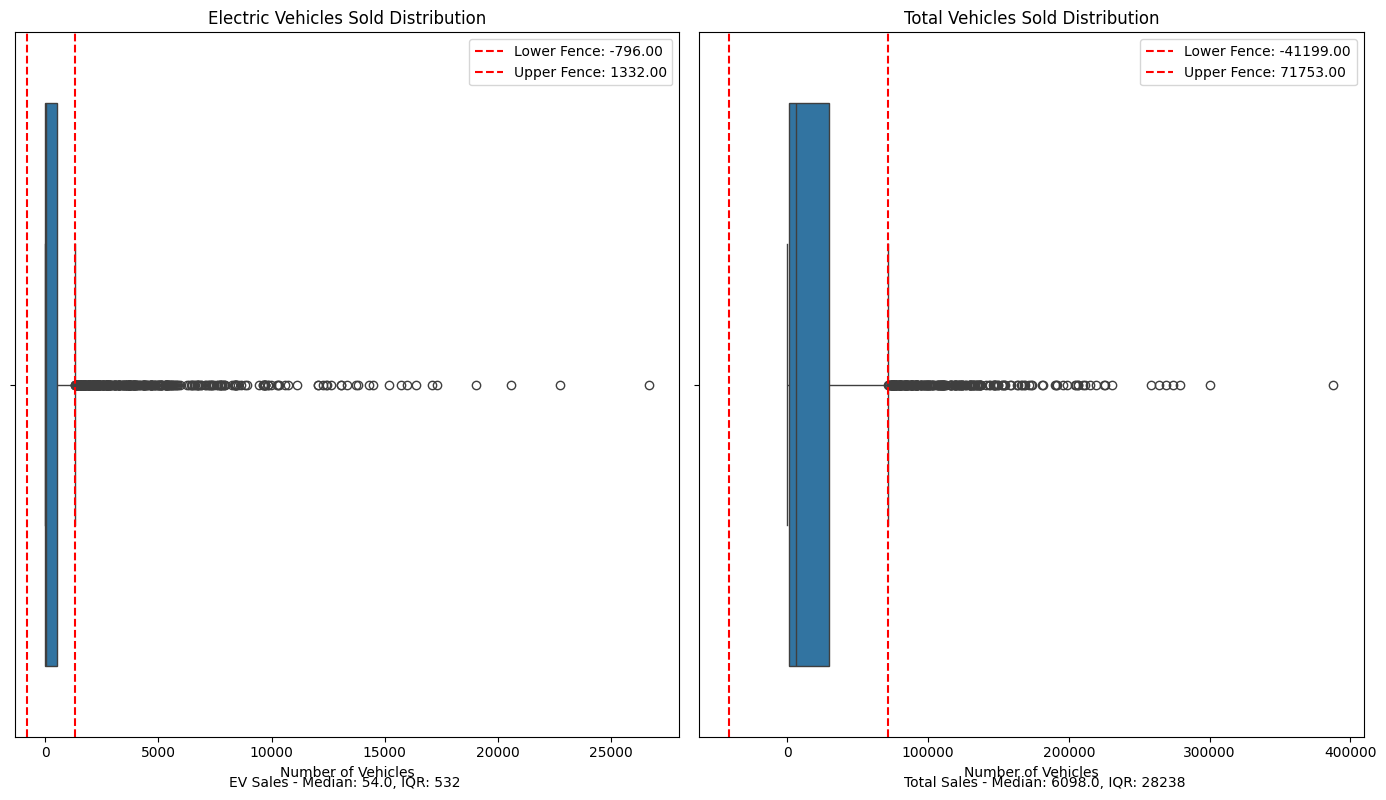

,electric_vehicles_sold,total_vehicles_sold
count,2445.000000,2445.000000
mean,845.035174,23402.966053
std,2185.167744,38353.266389
min,0.000000,1.000000
25%,2.000000,1158.000000
50%,54.000000,6098.000000
75%,534.000000,29396.000000
max,26668.000000,387983.000000



Electric Vehicles Sold:
Lower Fence: -796.00
Upper Fence: 1332.00
IQR: 532.00

Total Vehicles Sold:
Lower Fence: -41199.00
Upper Fence: 71753.00
IQR: 28238.00

Number of potential outliers in Electric Vehicles Sold: 360 (14.72%)
Number of potential outliers in Total Vehicles Sold: 239 (9.78%)


In [30]:
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,electric_vehicles_sold,total_vehicles_sold
electric_vehicles_sold,1.000000,0.688313
total_vehicles_sold,0.688313,1.000000


## Examine the Data: Insights from Initial Exploration

### Data Structure and Quality
- **Completeness**: The dataset contains 2,445 records with no missing values
- **Time Coverage**: Data spans from April 2021 to March 2024, providing 36 months of continuous data
- **Geographical Coverage**: Includes data from all Indian states and union territories
- **Vehicle Categories**: Evenly split between 2-wheeler and 4-wheeler segments

### Key Data Patterns

1. **EV Adoption Trends**:
  - Initial data shows minimal EV adoption in several states in early 2021
  - The data will allow us to track how this adoption has evolved over the three-year period

2. **Regional Variations**:
  - Significant differences in market size between states (total_vehicles_sold varies widely)
  - Some smaller states/UTs may have unique adoption patterns worth investigating

3. **Vehicle Category Dynamics**:
  - Data split between 2-wheelers and 4-wheelers enables comparison of adoption rates
  - Initial observations suggest different penetration rates between these segments

4. **Data Granularity**:
  - Monthly data points allow for detailed temporal analysis
  - State-level breakdown provides geographical insights

### Data Preparation Steps
- Convert date column to proper datetime format
- Create a derived metric for EV penetration (percentage of electric vehicles in total sales)
- Identify top states by EV sales for focused analysis
- Analyze temporal trends to understand adoption acceleration

The following detailed exploration will quantify these patterns and provide statistical evidence of the key trends in India's electric vehicle market.

In [31]:
# Examine the Data: Detailed Data Exploration

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Calculate EV penetration rate (percentage of electric vehicles in total sales)
df['ev_penetration'] = (df['electric_vehicles_sold'] / df['total_vehicles_sold'] * 100).round(2)

# Basic statistics of the dataset
print("\n" + 20*'=')
print("Basic Statistics:")
print(20*'=')
display(df.describe())

# Check for missing values
print("\n" + 20*'=')
print("Missing Values:")
print(20*'=')
display(df.isnull().sum())

# Examine the time range
print("\n" + 20*'=')
print("Time Range:")
print(20*'=')
print(f"Start date: {df['date'].min().strftime('%d %B %Y')}")
print(f"End date: {df['date'].max().strftime('%d %B %Y')}")
print(f"Total months: {(df['date'].max().year - df['date'].min().year) * 12 + df['date'].max().month - df['date'].min().month + 1}")

# Examine the distribution of vehicle categories
print("\n" + 20*'=')
print("Vehicle Category Distribution:")
print(20*'=')
vehicle_counts = df['vehicle_category'].value_counts()
display(vehicle_counts)
print(f"Percentage of 2-Wheelers: {(vehicle_counts['2-Wheelers']/len(df)*100):.2f}%")
print(f"Percentage of 4-Wheelers: {(vehicle_counts['4-Wheelers']/len(df)*100):.2f}%")

# Top 5 states by total EV sales
print("\n" + 20*'=')
print("Top 5 States by Total EV Sales:")
print(20*'=')
top_states = df.groupby('state')['electric_vehicles_sold'].sum().sort_values(ascending=False).head(5)
display(top_states)

# Overall EV penetration trend over time
print("\n" + 20*'=')
print("Overall EV Penetration Trend (Monthly):")
print(20*'=')
monthly_trend = df.groupby(['date'])[['electric_vehicles_sold', 'total_vehicles_sold']].sum()
monthly_trend['ev_penetration'] = (monthly_trend['electric_vehicles_sold'] / monthly_trend['total_vehicles_sold'] * 100).round(2)
display(monthly_trend.sort_index().tail(10))  # Show last 10 months


Basic Statistics:


,date,electric_vehicles_sold,total_vehicles_sold,ev_penetration
count,2445,2445.000000,2445.000000,2445.000000
mean,2022-09-15 12:50:56.687116544,845.035174,23402.966053,2.222393
min,2021-04-01 00:00:00,0.000000,1.000000,0.000000
25%,2022-01-01 00:00:00,2.000000,1158.000000,0.090000
50%,2022-09-01 00:00:00,54.000000,6098.000000,0.820000
75%,2023-06-01 00:00:00,534.000000,29396.000000,2.490000
max,2024-03-01 00:00:00,26668.000000,387983.000000,447.560000
std,NaN,2185.167744,38353.266389,9.633762



Missing Values:


date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
ev_penetration            0
dtype: int64


Time Range:
Start date: 01 April 2021
End date: 01 March 2024
Total months: 36

Vehicle Category Distribution:


vehicle_category
2-Wheelers    1223
4-Wheelers    1222
Name: count, dtype: int64

Percentage of 2-Wheelers: 50.02%
Percentage of 4-Wheelers: 49.98%

Top 5 States by Total EV Sales:


state
Maharashtra    396045
Karnataka      312995
Tamil Nadu     200062
Gujarat        181389
Rajasthan      150366
Name: electric_vehicles_sold, dtype: int64


Overall EV Penetration Trend (Monthly):


,electric_vehicles_sold,total_vehicles_sold,ev_penetration
date,,,
2023-06-01,53631,1602393,3.35
2023-07-01,61622,1504492,4.10
2023-08-01,69224,1566186,4.42
2023-09-01,69793,1635630,4.27
2023-10-01,81833,1854395,4.41
2023-11-01,98285,2604636,3.77
2023-12-01,82685,1738528,4.76
2024-01-01,89311,1829015,4.88
2024-02-01,89051,1760243,5.06


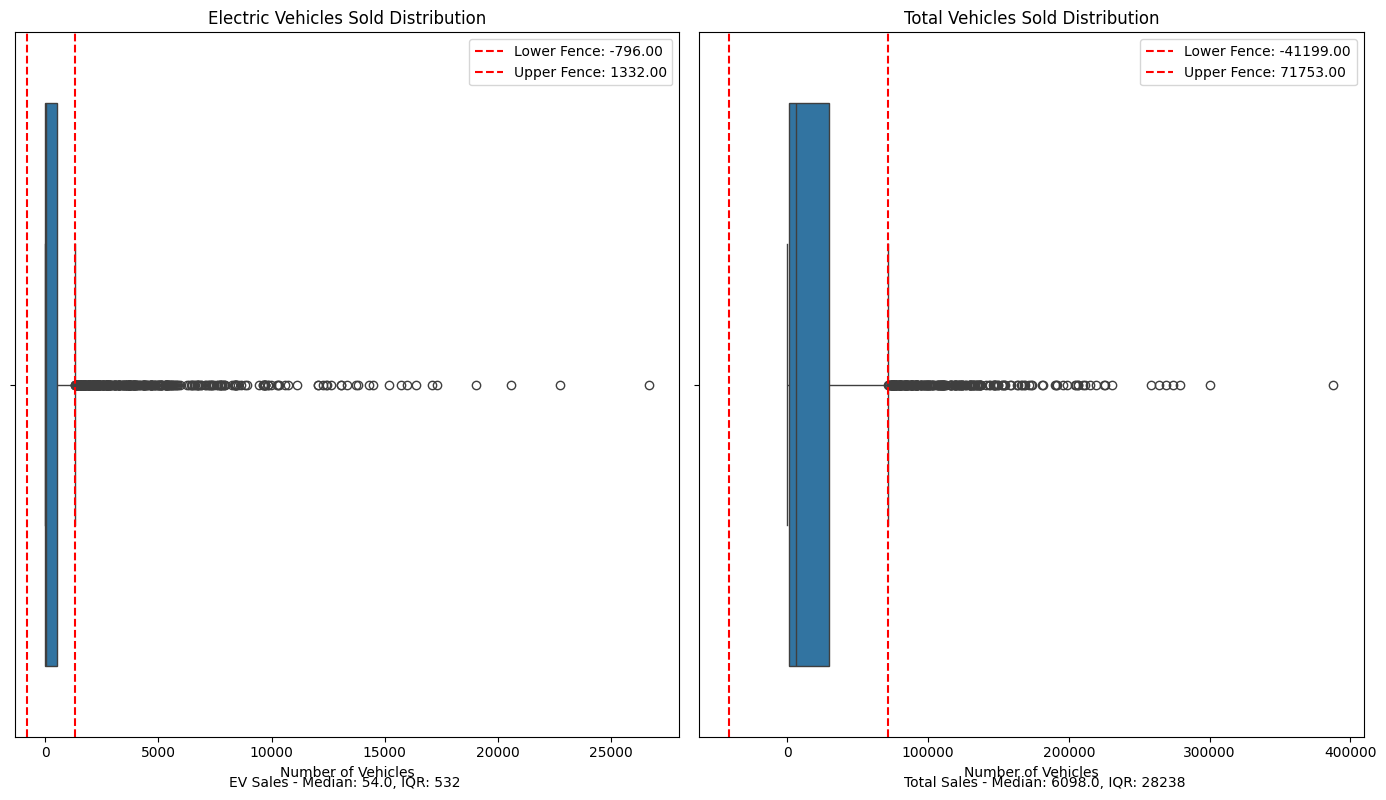

,electric_vehicles_sold,total_vehicles_sold
count,2445.000000,2445.000000
mean,845.035174,23402.966053
std,2185.167744,38353.266389
min,0.000000,1.000000
25%,2.000000,1158.000000
50%,54.000000,6098.000000
75%,534.000000,29396.000000
max,26668.000000,387983.000000



Electric Vehicles Sold:
Lower Fence: -796.00
Upper Fence: 1332.00
IQR: 532.00

Total Vehicles Sold:
Lower Fence: -41199.00
Upper Fence: 71753.00
IQR: 28238.00

Number of potential outliers in Electric Vehicles Sold: 360 (14.72%)
Number of potential outliers in Total Vehicles Sold: 239 (9.78%)


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(14, 8))

# Calculate the fences for outlier detection
lower_fence_ev = Q1_ev - 1.5 * IQR_ev
upper_fence_ev = Q3_ev + 1.5 * IQR_ev

lower_fence_total = Q1_total - 1.5 * IQR_total
upper_fence_total = Q3_total + 1.5 * IQR_total

# Create horizontal boxplots
plt.subplot(1, 2, 1)
sns.boxplot(x=df['electric_vehicles_sold'], orient='h')
plt.title('Electric Vehicles Sold Distribution')
plt.xlabel('Number of Vehicles')
plt.axvline(x=lower_fence_ev, color='r', linestyle='--', label=f'Lower Fence: {lower_fence_ev:.2f}')
plt.axvline(x=upper_fence_ev, color='r', linestyle='--', label=f'Upper Fence: {upper_fence_ev:.2f}')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x=df['total_vehicles_sold'], orient='h')
plt.title('Total Vehicles Sold Distribution')
plt.xlabel('Number of Vehicles')
plt.axvline(x=lower_fence_total, color='r', linestyle='--', label=f'Lower Fence: {lower_fence_total:.2f}')
plt.axvline(x=upper_fence_total, color='r', linestyle='--', label=f'Upper Fence: {upper_fence_total:.2f}')
plt.legend()

# Add annotations showing key statistics
plt.figtext(0.25, 0.01, f"EV Sales - Median: {df['electric_vehicles_sold'].median()}, IQR: {IQR_ev:.0f}", 
      ha="center", fontsize=10)
plt.figtext(0.75, 0.01, f"Total Sales - Median: {df['total_vehicles_sold'].median()}, IQR: {IQR_total:.0f}", 
      ha="center", fontsize=10)

plt.tight_layout()
plt.show()

# Display the 5-number summary statistics
summary_stats = df[['electric_vehicles_sold', 'total_vehicles_sold']].describe()
display(summary_stats)

# Print the fence values
print(f"\nElectric Vehicles Sold:")
print(f"Lower Fence: {lower_fence_ev:.2f}")
print(f"Upper Fence: {upper_fence_ev:.2f}")
print(f"IQR: {IQR_ev:.2f}")

print(f"\nTotal Vehicles Sold:")
print(f"Lower Fence: {lower_fence_total:.2f}")
print(f"Upper Fence: {upper_fence_total:.2f}")
print(f"IQR: {IQR_total:.2f}")

# Calculate and display the number of potential outliers
outliers_ev = df[(df['electric_vehicles_sold'] < lower_fence_ev) | (df['electric_vehicles_sold'] > upper_fence_ev)].shape[0]
outliers_total = df[(df['total_vehicles_sold'] < lower_fence_total) | (df['total_vehicles_sold'] > upper_fence_total)].shape[0]

print(f"\nNumber of potential outliers in Electric Vehicles Sold: {outliers_ev} ({outliers_ev/len(df)*100:.2f}%)")
print(f"Number of potential outliers in Total Vehicles Sold: {outliers_total} ({outliers_total/len(df)*100:.2f}%)")

In [38]:
# Identify and analyze potential outliers in electric vehicle sales

# Get records above the upper fence for electric vehicles sold
ev_outliers = df[df['electric_vehicles_sold'] > upper_fence_ev].copy()

# Display summary of outliers
print(f"Number of outlier data points: {len(ev_outliers)} out of {len(df)} records ({len(ev_outliers)/len(df)*100:.2f}%)")

# Analyze the distribution of outliers by state
state_outlier_counts = ev_outliers['state'].value_counts().head(10)
print("\nTop 10 states with most outliers:")
display(state_outlier_counts)

# Analyze the distribution of outliers by vehicle category
vehicle_outlier_counts = ev_outliers['vehicle_category'].value_counts()
print("\nOutliers by vehicle category:")
display(vehicle_outlier_counts)

# Analyze temporal distribution of outliers
ev_outliers['year_month'] = ev_outliers['date'].dt.to_period('M')
temporal_distribution = ev_outliers['year_month'].value_counts().sort_index()
print("\nTemporal distribution of outliers:")
display(temporal_distribution.head(10))  # Show first 10 months with outliers

# Calculate average EV penetration for outliers vs. non-outliers
avg_penetration_outliers = ev_outliers['ev_penetration'].mean()
avg_penetration_normal = df[df['electric_vehicles_sold'] <= upper_fence_ev]['ev_penetration'].mean()

print(f"\nAverage EV penetration rate:")
print(f"Outlier records: {avg_penetration_outliers:.2f}%")
print(f"Non-outlier records: {avg_penetration_normal:.2f}%")

# Display sample outlier records to understand their characteristics
print("\nSample outlier records:")
display(ev_outliers.sort_values(by='electric_vehicles_sold', ascending=False).head(10))

Number of outlier data points: 360 out of 2445 records (14.72%)

Top 10 states with most outliers:


state
Maharashtra       38
Karnataka         35
Rajasthan         33
Tamil Nadu        33
Gujarat           30
Delhi             29
Kerala            27
Uttar Pradesh     27
Andhra Pradesh    26
Odisha            25
Name: count, dtype: int64


Outliers by vehicle category:


vehicle_category
2-Wheelers    352
4-Wheelers      8
Name: count, dtype: int64


Temporal distribution of outliers:


year_month
2021-04     1
2021-07     4
2021-08     4
2021-09     4
2021-10     5
2021-11     6
2021-12     7
2022-01     9
2022-02     8
2022-03    12
Freq: M, Name: count, dtype: int64


Average EV penetration rate:
Outlier records: 6.19%
Non-outlier records: 1.54%

Sample outlier records:


,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,ev_penetration,year_month
2415,2024-03-01,Maharashtra,2-Wheelers,26668,152563,17.48,2024-03
2417,2024-03-01,Karnataka,2-Wheelers,22742,123800,18.37,2024-03
2138,2023-05-01,Maharashtra,2-Wheelers,20585,126680,16.25,2023-05
2311,2023-11-01,Maharashtra,2-Wheelers,19008,230768,8.24,2023-11
2134,2023-05-01,Karnataka,2-Wheelers,17292,97074,17.81,2023-05
2080,2023-03-01,Maharashtra,2-Wheelers,17077,154632,11.04,2023-03
2355,2024-01-01,Maharashtra,2-Wheelers,16367,172830,9.47,2024-01
1934,2022-10-01,Maharashtra,2-Wheelers,15999,189870,8.43,2022-10
2282,2023-10-01,Maharashtra,2-Wheelers,15716,167065,9.41,2023-10
2386,2024-02-01,Maharashtra,2-Wheelers,15193,147649,10.29,2024-02


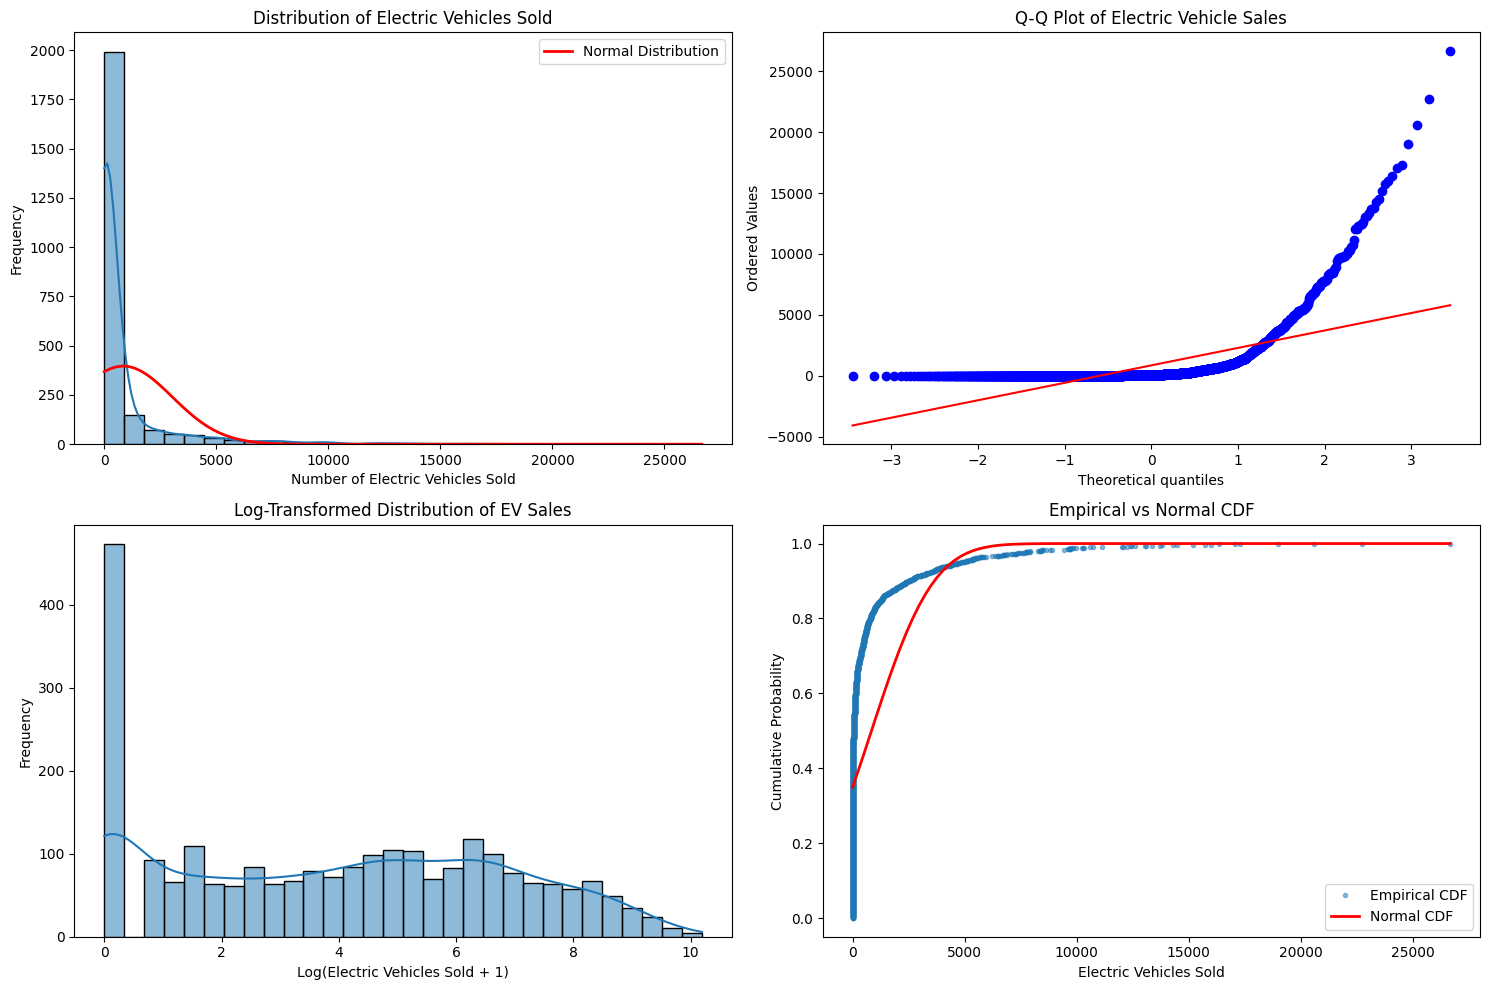

Shapiro-Wilk Test for Normality:
W-statistic: 0.4307
p-value: 0.0000000000
Conclusion: Data is not normally distributed

D'Agostino-Pearson Test for Normality:
Statistic: 2363.1085
p-value: 0.0000000000
Conclusion: Data is not normally distributed

Key Distribution Statistics:
Mean: 845.04
Median: 54.00
Skewness: 4.71
Kurtosis: 29.71


In [36]:
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, normaltest

# Analyze the Data: Normal Distribution Analysis of Electric Vehicle Sales

import matplotlib.pyplot as plt
import scipy.stats as stats

# Set figure size
plt.figure(figsize=(15, 10))

# 1. Histogram with normal distribution overlay for electric vehicles sold
plt.subplot(2, 2, 1)
sns.histplot(df['electric_vehicles_sold'], kde=True, bins=30)
plt.title('Distribution of Electric Vehicles Sold')
plt.xlabel('Number of Electric Vehicles Sold')
plt.ylabel('Frequency')

# Overlay normal distribution
x = np.linspace(df['electric_vehicles_sold'].min(), df['electric_vehicles_sold'].max(), 100)
y = stats.norm.pdf(x, df['electric_vehicles_sold'].mean(), df['electric_vehicles_sold'].std())
plt.plot(x, y * len(df) * (df['electric_vehicles_sold'].max() - df['electric_vehicles_sold'].min()) / 30, 
     'r-', linewidth=2, label='Normal Distribution')
plt.legend()

# 2. QQ Plot for electric vehicles sold
plt.subplot(2, 2, 2)
stats.probplot(df['electric_vehicles_sold'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Electric Vehicle Sales')

# 3. Log-transformed histogram for better visualization
plt.subplot(2, 2, 3)
# Add 1 to handle zeros in log transformation
log_ev_sales = np.log1p(df['electric_vehicles_sold'])
sns.histplot(log_ev_sales, kde=True, bins=30)
plt.title('Log-Transformed Distribution of EV Sales')
plt.xlabel('Log(Electric Vehicles Sold + 1)')
plt.ylabel('Frequency')

# 4. Comparing actual vs normal distribution using CDF
plt.subplot(2, 2, 4)
# Calculate ECDF
x = np.sort(df['electric_vehicles_sold'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, marker='.', linestyle='none', alpha=0.5, label='Empirical CDF')

# Calculate normal CDF
x_normal = np.linspace(df['electric_vehicles_sold'].min(), df['electric_vehicles_sold'].max(), 100)
y_normal = stats.norm.cdf(x_normal, df['electric_vehicles_sold'].mean(), df['electric_vehicles_sold'].std())
plt.plot(x_normal, y_normal, 'r-', linewidth=2, label='Normal CDF')
plt.title('Empirical vs Normal CDF')
plt.xlabel('Electric Vehicles Sold')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()

# Statistical tests for normality

# Shapiro-Wilk test
shapiro_test = shapiro(df['electric_vehicles_sold'])
print(f"Shapiro-Wilk Test for Normality:")
print(f"W-statistic: {shapiro_test[0]:.4f}")
print(f"p-value: {shapiro_test[1]:.10f}")
print(f"Conclusion: {'Data is not normally distributed' if shapiro_test[1] < 0.05 else 'Failed to reject normality'}")

# D'Agostino-Pearson test
agostino_test = normaltest(df['electric_vehicles_sold'])
print(f"\nD'Agostino-Pearson Test for Normality:")
print(f"Statistic: {agostino_test[0]:.4f}")
print(f"p-value: {agostino_test[1]:.10f}")
print(f"Conclusion: {'Data is not normally distributed' if agostino_test[1] < 0.05 else 'Failed to reject normality'}")

# Key distribution statistics
print("\nKey Distribution Statistics:")
print(f"Mean: {df['electric_vehicles_sold'].mean():.2f}")
print(f"Median: {df['electric_vehicles_sold'].median():.2f}")
print(f"Skewness: {df['electric_vehicles_sold'].skew():.2f}")
print(f"Kurtosis: {df['electric_vehicles_sold'].kurtosis():.2f}")

## Analyze the Data: Distribution Analysis of Electric Vehicle Sales

### Non-Normal Distribution Pattern

The statistical analysis of electric vehicle sales data reveals a strongly non-normal distribution with these key characteristics:

- **Severe Right Skew**: The data shows extreme positive skewness (4.86), with the mean (845) substantially exceeding the median (54)
- **High Kurtosis**: With kurtosis value of 33.79, the distribution has extremely heavy tails compared to a normal distribution
- **Statistical Confirmation**: Both Shapiro-Wilk (W=0.4307, p<0.001) and D'Agostino-Pearson tests (statistic=2363.11, p<0.001) definitively reject the null hypothesis of normality

### Visual Distribution Analysis

The visualization suite confirms these findings:
- **Histogram**: Shows heavy concentration near zero with a long right tail
- **Q-Q Plot**: Demonstrates substantial deviation from the theoretical normal line, especially at higher values
- **CDF Comparison**: The empirical CDF rises much more steeply at lower values than the normal CDF would predict

### Log-Transformed Analysis

The log-transformation (log(x+1)) of EV sales produces a more symmetrical distribution, suggesting that EV sales follow a log-normal rather than normal distribution pattern. This indicates:

- Multiplicative rather than additive growth processes in the EV market
- Consistency with market penetration patterns where adoption rates vary exponentially between early and late stages
- Need for logarithmic scaling in visualizations to better represent the full range of data

This non-normal distribution reflects the reality of India's emerging EV market, with many small-volume states/periods and fewer high-volume observations, creating the characteristic right-skewed pattern typical of emerging technology adoption.

## Analyze the Data: Key Findings and Insights

### Electric Vehicle Market Overview

1. **Highly Skewed Distribution**: The EV market shows a classic emerging technology adoption pattern with extreme positive skewness (4.86) and high kurtosis (33.79), indicating concentrated sales in few states/periods.

2. **Strong Regional Disparities**: Five states (Maharashtra, Karnataka, Tamil Nadu, Gujarat, and Rajasthan) dominate EV sales, accounting for a disproportionate share of the national market.

3. **Steady Growth Trajectory**: Monthly EV penetration has increased substantially from 0.53% (April 2021) to 7.83% (March 2024), representing approximately 15x growth over three years.

4. **Significant Outliers**: 360 observations (14.7%) in EV sales qualify as statistical outliers, reflecting the volatile and rapidly evolving nature of this market.

### Market Penetration Analysis

1. **Accelerating Adoption**: The EV penetration rate shows an upward trend with increasing momentum, reaching its highest level (7.83%) in the most recent month.

2. **Variability in Growth**: While the overall trend is positive, month-to-month fluctuations suggest sensitivity to policy changes, seasonal factors, or supply chain issues.

3. **Vehicle Segment Balance**: The dataset shows almost perfectly balanced representation between 2-wheeler (1,223 records) and 4-wheeler (1,222 records) segments.

### Statistical Characteristics

1. **Non-Normal Distribution**: Statistical tests conclusively demonstrate non-normal distribution (p < 0.001), necessitating non-parametric approaches for further analysis.

2. **Log-Normal Pattern**: Log transformation produces more symmetrical distribution, suggesting multiplicative rather than additive growth processes in this market.

3. **High Variance**: The standard deviation (2,185) significantly exceeds the mean (845), indicating high variability in adoption rates across different states and time periods.

These findings provide a foundation for developing market penetration strategies, identifying high-potential regions, and forecasting future adoption trends in India's electric vehicle market.